# Прогнозирование временных рядов на карте (Трушкин)

Задача этого проекта — научиться предсказывать количество поездок в ближайшие часы в каждом районе Нью-Йорка. Для того, чтобы её решить, сырые данные необходимо агрегировать по часам и районам. Агрегированные данные будут представлять собой почасовые временные ряды с количествами поездок из каждого района. Похожие задачи возникают на практике, если вам необходимо спрогнозировать продажи большого количества товаров в большом количестве магазинов, объём снятия денег в сети банкоматов, посещаемость разных страниц сайта и т.д.

## Знакомство с данными и агрегация

Скачайте сырые данные о поездках жёлтого такси с сайта TLC: 

http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml

Поездки зелёного такси и лимузинов нас не интересуют!

Данные выложены в файлах по месяцам. Скачайте так много данных жёлтого такси, как сможете; чем больше вы будете использовать данных, тем точнее получатся ваши прогнозы. Если вы решите использовать не все данные, а только часть, выбирайте её по времени с конца. Абсолютный минимум необходимых данных — 6 месяцев: один, последний месяц, вам понадобится для тестирования, предшествующие 5 — для обучения. По 5 месяцам можно построить прогнозы, учитывающие дневную и недельную сезонности, но в данных есть и годовая. Чтобы её учесть, необходимы данные как минимум за 2 года.

Обработайте сырые данные по следующей схеме:
1. Почистите данные от ошибок и аномалий.
1. Отбросьте минуты и секунды во времени начала поездки.
1. Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты. Разбейте этот прямоугольник на 2500 одинаковых прямоугольных областей — по 50 интервалов вдоль каждой оси.
1. Посчитайте количество поездок за каждый час из каждой области. Не забудьте, что если в сырых данных для какой-то пары час-область нет ни одной записи, то в агрегированных данных для неё должен стоять 0.


В дальнейшем, когда вы будете предсказывать получившиеся ряды, нужно будет загружать ваши прогнозы на kaggle, поэтому нужно, чтобы идентификаторы ячеек были определены однозначно. В следующем файле даны идентификаторы ячеек, которые вам нужно использовать, и географические координаты их границ:

regions.csv

Для сдачи задания этой недели вам нужно агрегировать только данные за май 2016, но, когда задание будет сдано, не забудьте запустить ваш агрегирующий скрипт на всех остальных месяцах, которые вы собираетесь использовать при прогнозировании.

Чтобы сдать задание, выполните следующую последовательность действий.

1. Загрузите данные за май 2016 года.

2. Проведите фильтрацию: удалите поездки с
  * нулевой длительностью   
  * нулевым количеством пассажиров
  * нулевым расстоянием поездки по счётчику
  * координатами начала, не попадающими в прямоугольник Нью-Йорка 
3. Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.

4. Выведите первые строки полученной таблицы.

5. Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.

6. Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.

7. Загрузите ноутбук в форму ниже

### Review criteria

В качестве ответа в этом задании вам нужно загрузить ноутбук; убедитесь, что ход анализа, который вы провели, описан достаточно подробно для того, чтобы ваши сокурсники поняли, что вы делали и почему.

### Описание полей CSV-файлов

Field | Description
--- | ---
VendorID | A code indicating the TPEP provider that provided the record. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
tpep_pickup_datetime | The date and time when the meter was engaged.
tpep_dropoff_datetime | The date and time when the meter was disengaged.
Passenger_count | The number of passengers in the vehicle. This is a driver-entered value.
Trip_distance | The elapsed trip distance in miles reported by the taximeter.
Pickup_longitude | Longitude where the meter was engaged.
Pickup_latitude | Latitude where the meter was engaged.
RateCodeID | The final rate code in effect at the end of the trip. 1= Standard rate 2=JFK 3=Newark 4=Nassau or Westchester 5=Negotiated fare 6=Group ride
Store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. Y= store and forward trip N= not a store and forward trip
Dropoff_longitude | Longitude where the meter was disengaged.
Dropoff_latitude | Latitude where the meter was disengaged.
Payment_type | A numeric code signifying how the passenger paid for the trip. 1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip
Fare_amount | The time-and-distance fare calculated by the meter.
Extra | Miscellaneous extras and surcharges. Currently, this only includes the \$0.50 and \$1 rush hour and overnight charges.
MTA_tax | \$0.50 MTA tax that is automatically triggered based on the metered rate in use.
Improvement_surcharge | \$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
Tip_amount | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
Tolls_amount | Total amount of all tolls paid in trip.
Total_amount | The total amount charged to passengers. Does not include cash tips.

In [1]:
import pandas as pd
import numpy as np
import cPickle
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
%matplotlib inline

Загрузим из файла таблицу с id условных областей NY из задания.

In [3]:
ny_regions = pd.read_csv("regions.csv", sep=";", dtype={
        "region":np.uint16,
        "west":np.float64,
        "east":np.float64,
        "south":np.float64,
        "north":np.float64})
ny_regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


Границы прямоугольника, в который вписан NY (из задания). Долгота по-английски будет longitude, широта – latitude.

Ниже – векторизованные функции: проверяющая, попадает ли точка в этот прямоугольник и выдающая id областей.

In [42]:
ny_limits= {"lon_min":-74.25559, "lon_max":-73.70001, "lat_min":40.49612, "lat_max":40.91553}
lon_step=(ny_limits["lon_max"]-ny_limits["lon_min"])/50
lat_step=(ny_limits["lat_max"]-ny_limits["lat_min"])/50

def check_ny_limits(lons, lats):
    """
    Check if point within NY rectangle
    """
    return ~((lons < ny_limits["lon_min"]) | 
              (lons > ny_limits["lon_max"]) | 
              (lats < ny_limits["lat_min"]) | 
              (lats > ny_limits["lat_max"])) 

def get_area_ids(lons, lats):
    """
    Calculate numpy vector of NY regions from longitude and latitude
    """
    return (1 + np.floor((lons-ny_limits["lon_min"])/lon_step)*50 + 
            (lats-ny_limits["lat_min"])/lat_step).astype(np.uint32)

print "Test get_area_ids function:"
print (get_area_ids(ny_regions.west.values+0.00001, ny_regions.south.values+0.00001)==ny_regions.region).all()
print (get_area_ids(ny_regions.west.values+0.00001, ny_regions.north.values-0.00001)==ny_regions.region).all()
print (get_area_ids(ny_regions.east.values-0.00001, ny_regions.south.values+0.00001)==ny_regions.region).all()
print (get_area_ids(ny_regions.east.values-0.00001, ny_regions.north.values-0.00001)==ny_regions.region).all()

Test get_area_ids function:
True
True
True
True


### Загружаем данные за май 2016 года

Считываем данные за май 2016 из CSV-файла.

In [5]:
%%time
data = pd.read_csv("./data/yellow_tripdata_2016-05.csv", dtype={
        "VendorID":np.int8,
        #"tpep_pickup_datetime":np.datetime64,
        #"tpep_dropoff_datetime":np.datetime64,
        "passenger_count":np.int8,
        "trip_distance":np.float32,
        "pickup_longitude":np.float64,
        "pickup_latitude":np.float64,
        "RatecodeID":np.int8,
        "store_and_fwd_flag":np.bool_,
        "dropoff_longitude":np.float64,
        "dropoff_latitude":np.float64,
        "payment_type":np.int8,
        "fare_amount":np.float32,
        "extra":np.float32,
        "mta_tax":np.float32,
        "tip_amount":np.float32,
        "tolls_amount":np.float32,
        "improvement_surcharge":np.float32,
        "total_amount":np.float32 }, 
        parse_dates=[1, 2],
        converters={"store_and_fwd_flag": lambda x: x=='Y',})
#data.info()

CPU times: user 45.1 s, sys: 2.47 s, total: 47.5 s
Wall time: 47.6 s


In [6]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,False,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.799999
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,False,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.680000
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,False,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.360000
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,False,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.959999
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,False,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.760000


### Проведём фильтрацию
Удаляем поездки с координатами начала, не попадающими в прямоугольник Нью-Йорка. 

Судя по заданию, поездки могут заканчиваться не в Нью-Йорке.

In [7]:
def filter_data_outside(d):
    d.drop( d[ ~ check_ny_limits(d.pickup_longitude, d.pickup_latitude)].index, inplace=True )

print "Before filtration: " + str(len(data))
filter_data_outside(data)
print "After trips froum outside of NY are filtered: " + str(len(data))

Before filtration: 11836853
After trips froum outside of NY are filtered: 11686529


Отбросим поездки с нулевой длительностью.

In [8]:
def filter_data_zero_duration(d):
    d.drop( d[(d.tpep_pickup_datetime == d.tpep_dropoff_datetime) ].index, inplace=True )

filter_data_zero_duration(data)
print "After trips with zero duration are filtered: " + str(len(data))

After trips with zero duration are filtered: 11675138


Также отбросим поездки с нулевым количеством пассажиров и нулевым расстоянием поездки по счётчику.

In [9]:
def filter_data_zero_passengers(d):
    d.drop( d[(d.passenger_count == 0) ].index, inplace=True )

def filter_data_zero_distance(d):
    d.drop( d[ (d.trip_distance < 0.001) ].index, inplace=True )    

filter_data_zero_passengers(data)
print "After trips with zero passengers are filtered: " + str(len(data))
filter_data_zero_distance(data)
print "After trips with zero distance are filtered: " + str(len(data))

#На будущее соберём все фильтры из задания в одну функцию:
def filter_data_generic(d):
    filter_data_outside(d)
    filter_data_zero_duration(d)
    filter_data_zero_passengers(d)
    filter_data_zero_distance(d)

After trips with zero passengers are filtered: 11674671
After trips with zero distance are filtered: 11626521


Это же диплом, да? Поэтому посмотрим, есть ли в данных другие артефакты:
1. Слишком большое число пассажиров (По правилам один спереди и четыре сзади. Сзади могут быть дети на коленях. Это даёт нам максимум 
девять).
1. Слишком быстрая поездка (На такси можно уехать в другую страну или штат, включая Техас, но мы можем быть весьма уверены, что водитель будет ехать не быстрее 70 миль в час).
1. Слишком долгая поездка (8 часов предел на мой взгляд).
1. Некорректные координаты высадки пассажира (Посадку мы уже проверили. Расстояние до места высадки должно быть, допустим, не дальше, чем длина\_маршрута\*1.1).
1. Некорректные RateCodeID, Payment_type.
1. Несостоявшиеся поездки (Payment_type==6).
1. Некорректная стоимость поездки (меньше нуля, или слишком большая).

Ниже функция для расчёта расстояния по координатам ( <https://stackoverflow.com/questions/15736995/how-can-i-quickly-estimate-the-distance-between-two-latitude-longitude-points> ). Чтобы работало веселее, я её векторизовал.

In [10]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    # 1 km = 0.621371 miles
    miles = 6367 * 0.621371 * c
    return miles

Функции для проверки упомянутых выше критериев

In [43]:
def check_passengers(d, max_passengers=9):
    return ((d.passenger_count < 0) | (d.passenger_count > max_passengers))

def check_speed(d, speed_limit=70):
    return (d.trip_distance/
            ((d.tpep_dropoff_datetime-d.tpep_pickup_datetime).
             values.astype("timedelta64[s]").astype(np.float32)
             /(60*60))
           ) > speed_limit

def check_duration(d, max_duration_h=8):
    return (d.tpep_dropoff_datetime-d.tpep_pickup_datetime) > np.timedelta64(max_duration_h, "h")

def check_gps(d, coef=1.1):
    return haversine(d.pickup_longitude.values,
                     d.pickup_latitude.values,
                     d.dropoff_longitude.values,
                     d.dropoff_latitude.values) > d.trip_distance.values*coef
    
def check_ratecode(d):
    return (d.RatecodeID < 1) | (d.RatecodeID > 6)

def check_payment_type(d):
    return (d.payment_type < 1) | (d.payment_type > 6)

def check_voided(d):
    return (d.payment_type == 6)

def check_cost(d, field, max_cost=1000):
    return ((d[field] < 0) | (d[field] > max_cost))

def check_optional (d, max_passengers=9, speed_limit=70, max_duration_h=8, gps_coef=1.1, max_cost=1000):
    return (check_passengers(d, max_passengers)|
            check_speed(d, speed_limit)|
            check_duration(d, max_duration)|
            check_gps(d, gps_coef)|
            check_ratecode(d)|
            check_payment_type(d)|
            check_voided(d)|
            check_cost(d, "extra", max_cost)|
            check_cost(d, "mta_tax", max_cost)|
            check_cost(d, "tip_amount", max_cost)|
            check_cost(d, "tolls_amount", max_cost)|
            check_cost(d, "improvement_surcharge", max_cost)|
            check_cost(d, "total_amount", max_cost))

def filter_data_optional(d, max_passengers=9, speed_limit=70, max_duration_h=8, gps_coef=1.1, max_cost=1000):
    d.drop(d[ check_optional(d, max_passengers, speed_limit, 
                             max_duration_h, gps_coef, max_cost) ].index, inplace=True )

In [12]:
speed_limit = 70
max_duration = 8
max_cost = 1000

Посмотрим, какое количество данных не подходит под эти критерии:

In [13]:
print "1: Too many passengers: " + str(check_passengers(data).sum())
print "2: Faster than " + str(speed_limit) + " mph: " + str(check_speed(data, speed_limit).sum())
print "3: Longer than " + str(max_duration) + " h: " + str(check_duration(data, max_duration).sum())
print "4: Inconsistent distance/GPS data: " + str(check_gps(data).sum())
print "5: Wrong RatecodeID or payment_type: " + str((check_ratecode(data)|check_payment_type(data)).sum())
print "6: Voided trips: " + str(check_voided(data).sum())
print "7: Wrong cost: "
for f in ("extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount"):
    print "\t" + f +": "+ str(check_cost(data, f, max_cost).sum())
print "All criteria: " + str(check_optional(data).sum())

1: Too many passengers: 0
2: Faster than 70 mph: 10389
3: Longer than 8 h: 17350
4: Inconsistent distance/GPS data: 125062
5: Wrong RatecodeID or payment_type: 111
6: Voided trips: 0
7: Wrong cost: 
	extra: 1839
	mta_tax: 3585
	tip_amount: 25
	tolls_amount: 13
	improvement_surcharge: 3637
	total_amount: 3638
All criteria: 155127


Неплохо. Удалим эти строки тоже. 

Потом можно будет сделать критерии жёстче, если это улучшит качество предсказания.

In [14]:
print "Before optional artefacts are filtered: " + str(len(data))
filter_data_optional(data)
print "After optional artefacts are filtered: " + str(len(data))

Before optional artefacts are filtered: 11626521
After optional artefacts are filtered: 11471394


## Разбиение на регионы и часы
Добавим колонку с областями и колонку с часом.

In [15]:
data["pickup_region"] = get_area_ids(data.pickup_longitude.values, data.pickup_latitude.values)

def check_pickup_regions(d):
    return ((d.pickup_region < 1) | (d.pickup_region > 2500))

print "Wrong region count: " + str(check_pickup_regions(data).sum())

def filter_pickup_regions(d):
    d.drop(d[ check_pickup_regions(d) ].index, inplace=True )

filter_pickup_regions(data)

#объединять дни не нужно
#data["hour"]=np.uint8([dt.hour for dt in data.tpep_pickup_datetime.astype(object)])

data["hour"]=(data.tpep_pickup_datetime.values-np.datetime64("2016-05-01")).astype("timedelta64[h]").astype(np.int16)

Wrong region count: 0


Число регионов, из которых в мае 2016 хотя бы раз были совершены поездки:

In [17]:
data["pickup_region"].unique().shape[0]

1073

### Сохраним результаты
Для того, чтобы в следующий раз быстро загрузить данные, воспользуюсь сериализацией cPickle.

In [18]:
%%time
with open("./data/yellow_tripdata_2016-05.cPickle2", "w") as f:
    cPickle.dump(data, f, 2)

CPU times: user 412 ms, sys: 1.56 s, total: 1.97 s
Wall time: 2.09 s


Считать данные можно так:

In [19]:
%%time
if False:
    with open("./data/yellow_tripdata_2016-05.cPickle2", "r") as f:
        data=cPickle.load(f)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


### Агрегируем по часам и областям

Должно получиться 744 корзины для часов * 2500 корзин для регионов.

In [32]:
binned_stats = stats.binned_statistic_2d(data.pickup_region.values, 
                                         data.hour.values, 
                                         None, 
                                         statistic='count', 
                                         bins=[np.arange(0.5,2500.+1), np.arange(-0.5,24.*31)])
print "Max. hour: " + str(24*31-1)
print "Bins boundaries and count:"
print binned_stats.x_edge[0], binned_stats.x_edge[-1], binned_stats.x_edge.shape[0]-1
print binned_stats.y_edge[0], binned_stats.y_edge[-1], binned_stats.y_edge.shape[0]-1

Max. hour: 743
Bins boundaries and count:
0.5 2500.5 2500
-0.5 743.5 744


Первые несколько строк таблицы выглядят совершенно не интересно:

In [33]:
binned_stats.statistic[0:10]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

Регион, в котором находится Empire state building:

In [34]:
empire_state_building=[-73.9856644, 40.7484405]
empire_state_building_region=get_area_ids(*empire_state_building)
print "Empire state building region: " + str(empire_state_building_region)

Empire state building region: 1231


График зависимости числа поездок от часа:

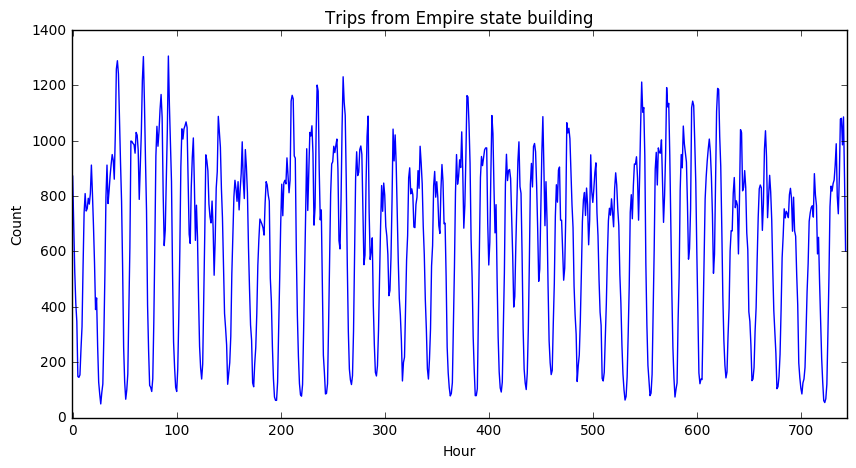

In [47]:
plt.figure(figsize=(10, 5))
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Trips from Empire state building")
plt.xlim(-1,744)

#substract 1 to get bin index
plt.plot(binned_stats.statistic[empire_state_building_region-1])

На графике видно что-то очень похожее на дневную и недельную сезонность.

Число пар час-ячейка в мае 2016, для которых не было совершено ни одной поездки:

In [41]:
zero_regions=(np.array(binned_stats.statistic.flatten())==0).sum()
zero_regions_percent=100*zero_regions/(2500*24*31)
print "Region-hour pairs with zero trips: " + str(zero_regions) + " (" + str(zero_regions_percent) + "%)"

Region-hour pairs with zero trips: 1720551 (92%)


Довольно неожиданный результат, всего 8% корзин содержат данные.